In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [115]:
pd.options.mode.chained_assignment = None

In [116]:
bankMarketingData = pd.read_csv("bank-additional-full.csv", sep=";")
bankMarketingData['y'] = bankMarketingData['y'].map({'yes': 1, 'no': 0})
bankMarketingData

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [117]:
bankMarketingData["nr.employed"].value_counts()

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64

In [118]:
bankMarketingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [119]:
def categoricalValueCounts(fields, df):
  for field in fields:
    print("*"*32)
    print(f"Value Counts for {field} is -:")
    print(df[f"{field}"].value_counts().sort_values(ascending=False))
    print("*"*32)

In [120]:
categoricalFields = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]
categoricalValueCounts(categoricalFields, bankMarketingData)

********************************
Value Counts for job is -:
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
********************************
********************************
Value Counts for marital is -:
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
********************************
********************************
Value Counts for education is -:
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
********************************
********************************
Value Counts for

In [121]:
bankMarketingData.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


**Data Visulization**

Text(0.5, 1.0, 'Age Count Distribution')

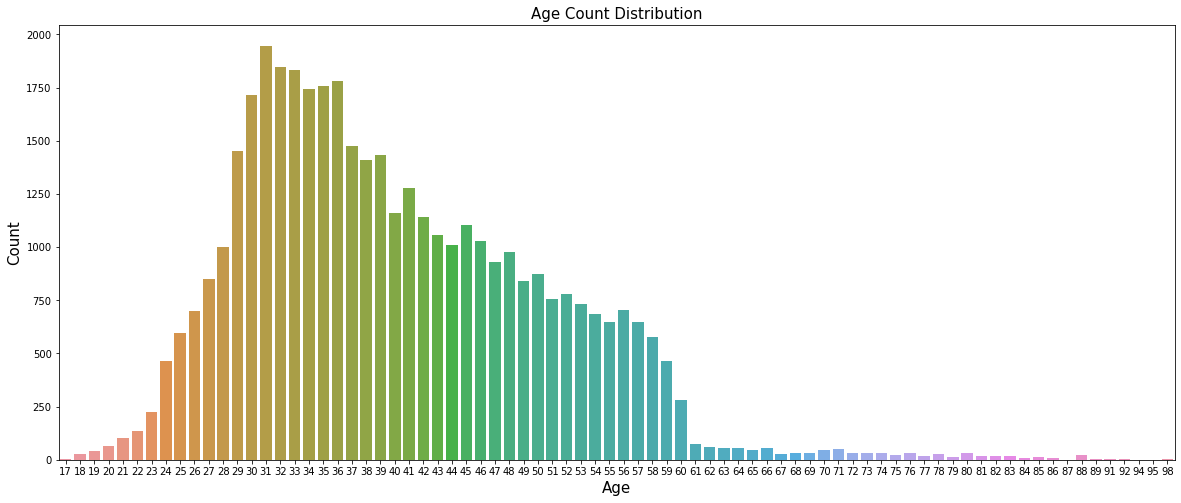

In [146]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = bankMarketingData)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)

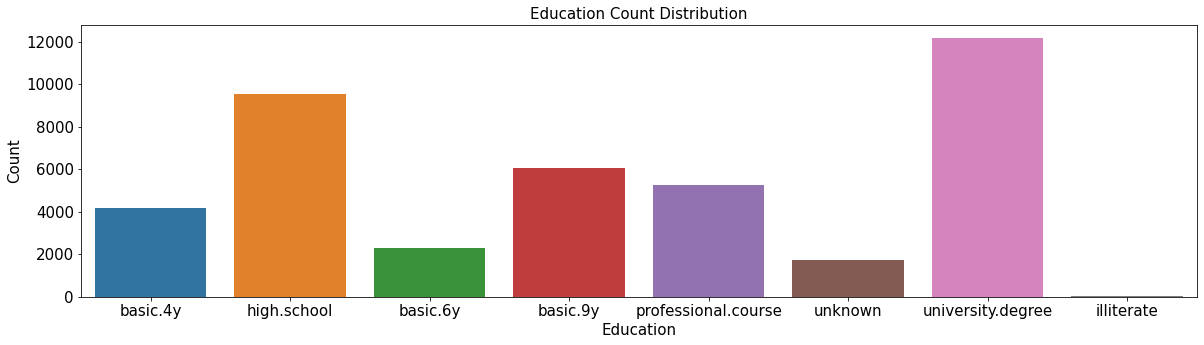

In [143]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'education', data = bankMarketingData)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)

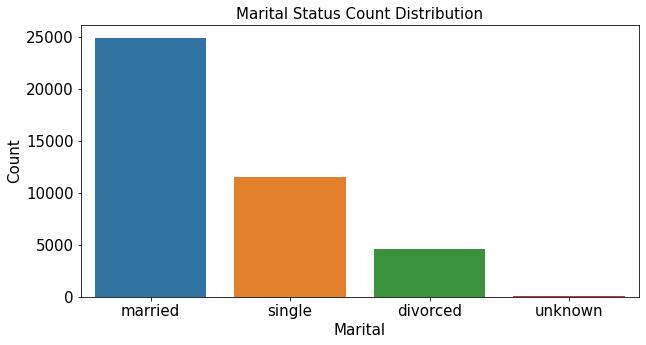

In [142]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital', data = bankMarketingData)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Marital Status Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)

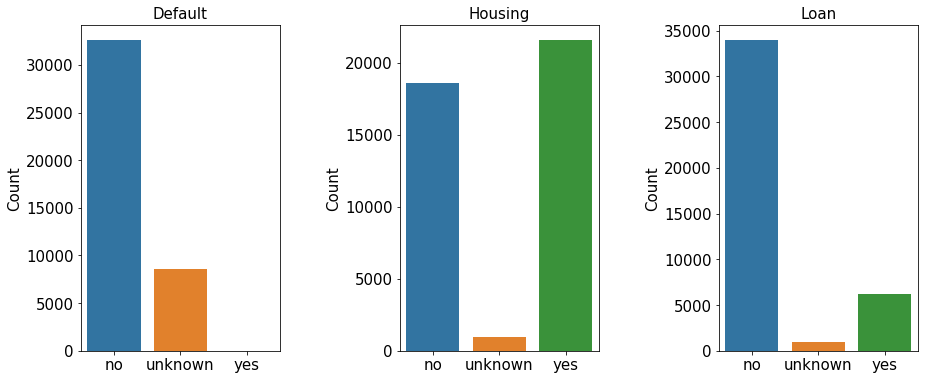

In [151]:
# Default, has credit in default ?
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
sns.countplot(x = 'default', data = bankMarketingData, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

# Housing, has housing loan ?
sns.countplot(x = 'housing', data = bankMarketingData, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

# Loan, has personal loan ?
sns.countplot(x = 'loan', data = bankMarketingData, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.6)

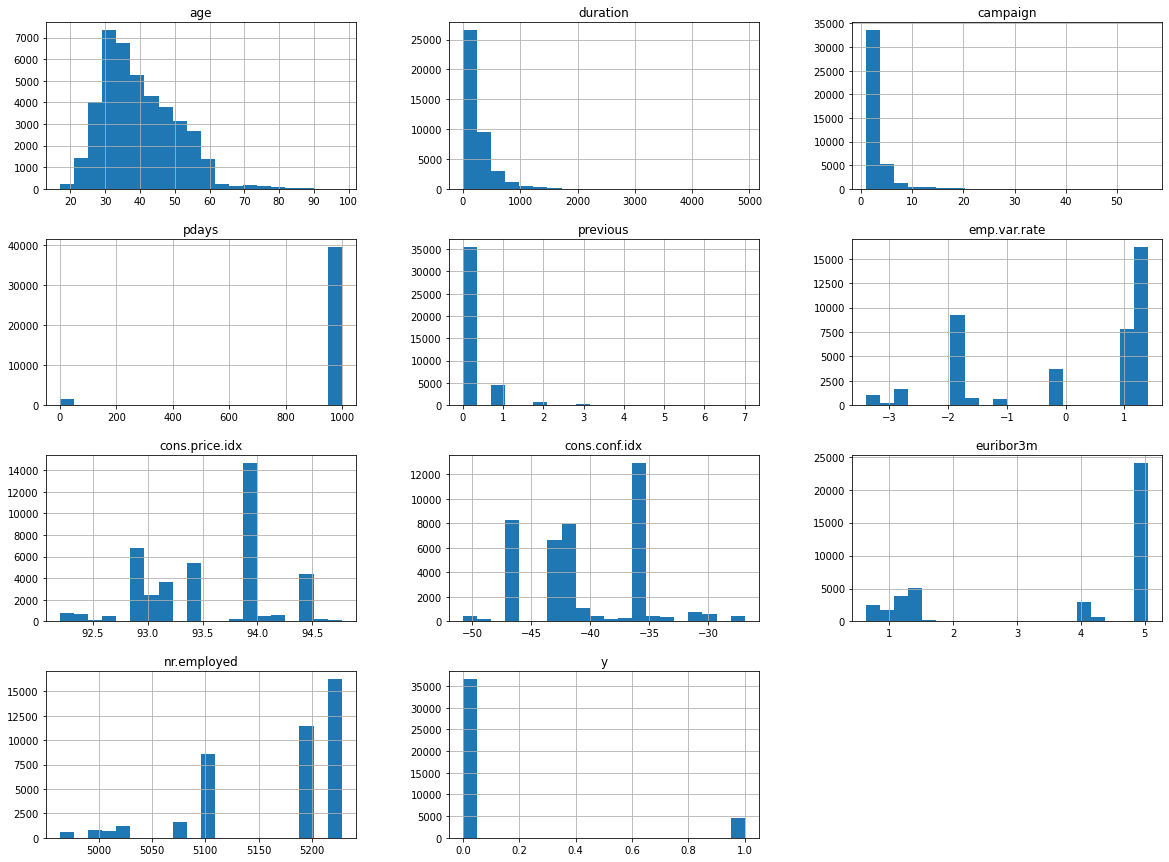

In [122]:
bankMarketingData.hist(bins=20, figsize=(20,15))
plt.show()

In [123]:
train_set, test_set = train_test_split(bankMarketingData, test_size=0.2, random_state=42)

In [124]:
bankMData = train_set.copy()

In [135]:
corr_matrix = bankMData.corr()
corr_matrix["age"].sort_values(ascending=False)

age               1.000000
cons.conf.idx     0.127198
y                 0.027631
previous          0.024633
euribor3m         0.011134
campaign          0.008029
cons.price.idx    0.005697
emp.var.rate      0.000654
duration         -0.002372
nr.employed      -0.018225
pdays            -0.037208
Name: age, dtype: float64

In [127]:
bankMData_X = bankMData.drop("y", axis=1)
bankMData_Y = bankMData["y"]

In [128]:
#Custom Transformer that extracts columns passed as argument to its constructor 
class FeatureSelector( BaseEstimator, TransformerMixin ):
    def __init__( self, feature_names ):
        self._feature_names = feature_names 
     
    def fit( self, X, y = None ):
        return self 

    def transform( self, X, y = None ):
        return X[ self._feature_names ] 


class NumericalTransformer( BaseEstimator, TransformerMixin ):
    def __init__(self ):
        pass
        
    def fit( self, X, y = None  ):
        return self
    
    def transform(self, X , y = None ):
       #returns numpy array
       return X.values


class CategoricalTransformer( BaseEstimator, TransformerMixin ):
    def __init__(self ):
        pass
        
    def fit( self, X, y = None  ):
        return self
    
    def transform(self, X , y = None ):
       X.loc[X['job'] == "unknown" ,'job'] = "unemployed"
       X.loc[X['marital'] == "unknown" ,'marital'] = "single"
       X.loc[X['education'] == "unknown" ,'education'] = "illiterate"
       X.loc[X['default'] == "unknown" ,'default'] = "yes"
      
       #returns numpy array
       return X.values

In [129]:
#Categrical features to pass down the categorical pipeline 
cateforical_features = ["job", "marital", "education", "default", "housing", "loan", "day_of_week", "poutcome"]

#Numerical features to pass down the numerical pipeline 
numerical_features = ['age', 'pdays', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

#Defining the steps in the categorical pipeline 
categorical_pipeline = Pipeline( steps = [ 
                                          ( 'cat_selector', FeatureSelector(cateforical_features) ),
                                          ( 'cat_transformer', CategoricalTransformer() ), 
                                          ( 'one_hot_encoder', OneHotEncoder( sparse = False ) ) 
                               ])
    
#Defining the steps in the numerical pipeline     
numerical_pipeline = Pipeline( steps = [ 
                                        ( 'num_selector', FeatureSelector(numerical_features) ),
                                        # ( 'num_transformer', NumericalTransformer() ),
                                        ('imputer', SimpleImputer(strategy = 'median') ),
                                        ( 'std_scaler', StandardScaler() ) 
                            ])

full_pipeline = FeatureUnion( transformer_list = [ 
                                                  ( 'categorical_pipeline', categorical_pipeline ), 
                                                  ( 'numerical_pipeline', numerical_pipeline ) 
                                              ])


In [130]:
bankMData_Y_prep = np.array(bankMData_Y)
bankMData_X_prep = full_pipeline.fit_transform(bankMData_X)

In [131]:
bankMData_Y_prep

array([0, 0, 0, ..., 1, 0, 0])

In [132]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(bankMData_X_prep, bankMData_Y)

LogisticRegression(max_iter=10000)

In [133]:
##Preparing Test Set
testSet_x = test_set.drop(["y"], axis=1)
testSet_x_prep = full_pipeline.transform(testSet_x)

testSet_y_labels = np.array(test_set["y"])

testSet_y_pred = log_reg.predict(testSet_x_prep)

In [155]:
from sklearn.metrics import confusion_matrix

score = log_reg.score(testSet_x_prep, testSet_y_labels)
cm = confusion_matrix(testSet_y_labels, testSet_y_pred)

In [156]:
print("Score -: ", score)
print("Confusion matrix -:")
print(cm)

Score -:  0.8970623937848993
Confusion matrix -:
[[7207   96]
 [ 752  183]]


In [158]:
from sklearn.metrics import classification_report

print('Reports\n',classification_report(testSet_y_labels, testSet_y_pred))

Reports
               precision    recall  f1-score   support

           0       0.91      0.99      0.94      7303
           1       0.66      0.20      0.30       935

    accuracy                           0.90      8238
   macro avg       0.78      0.59      0.62      8238
weighted avg       0.88      0.90      0.87      8238



Text(0.5, 1.0, 'Accuracy Score: 0.8970623937848993')

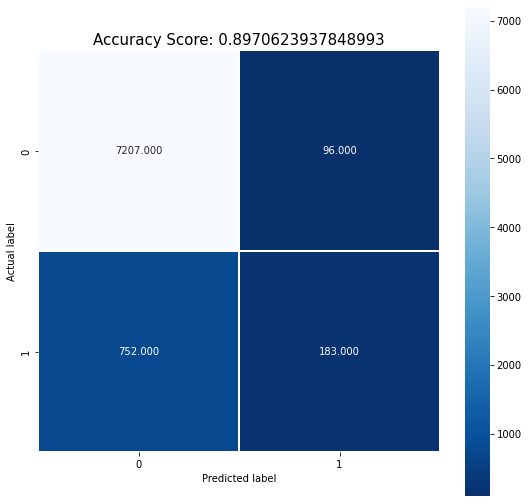

In [153]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)